In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from modules.LDS import Kalman_EM
from modules.WF_sim import *

from pathlib import Path
import pandas as pd

CB_colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']

England_regions=['NE',  'NW', 'YH', 'EM','WM', 'EE', 'LDN','SE', 'SW']

In [48]:
#conda install scikit-learn  #comment out if not installed

In [49]:
from sklearn.manifold import MDS

In [50]:
def kl_divergence(p, q):
    """ Calculate Kullback-Leibler divergence """
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

def distdemes_from_A(A):
    """ Calculate distance in terms of Jensen-Shannon between rows """
    ND =len(A)
    dist_matrix= np.zeros((ND,ND)) #(a+a.T)/2 ### needs to be symmetric

    for i in range(ND):
        for j in range(ND):
            p = A[i].copy()
            q = A[j].copy()
            
            p = np.delete(p,[i,j])
            q = np.delete(q,[i,j])
            
            # re-normalize
            p *=1.0/np.sum(p)
            q *=1.0/np.sum(q)
            m = 0.5*(p+q)
            dist_matrix[i,j] =0.5 * (kl_divergence(p, m) + kl_divergence(q, m))
    dist_matrix=np.sqrt(dist_matrix)

    return dist_matrix

# UTLA level

In [72]:
ND=120
res_A=np.load('data/A_Delta_England/res_A_ND'+str(ND)+'.npy')
Amean=np.mean(res_A,axis=0)
df_demes=pd.read_csv('data/A_Delta_England/demes_ND'+str(ND)+'.csv',index_col=0)


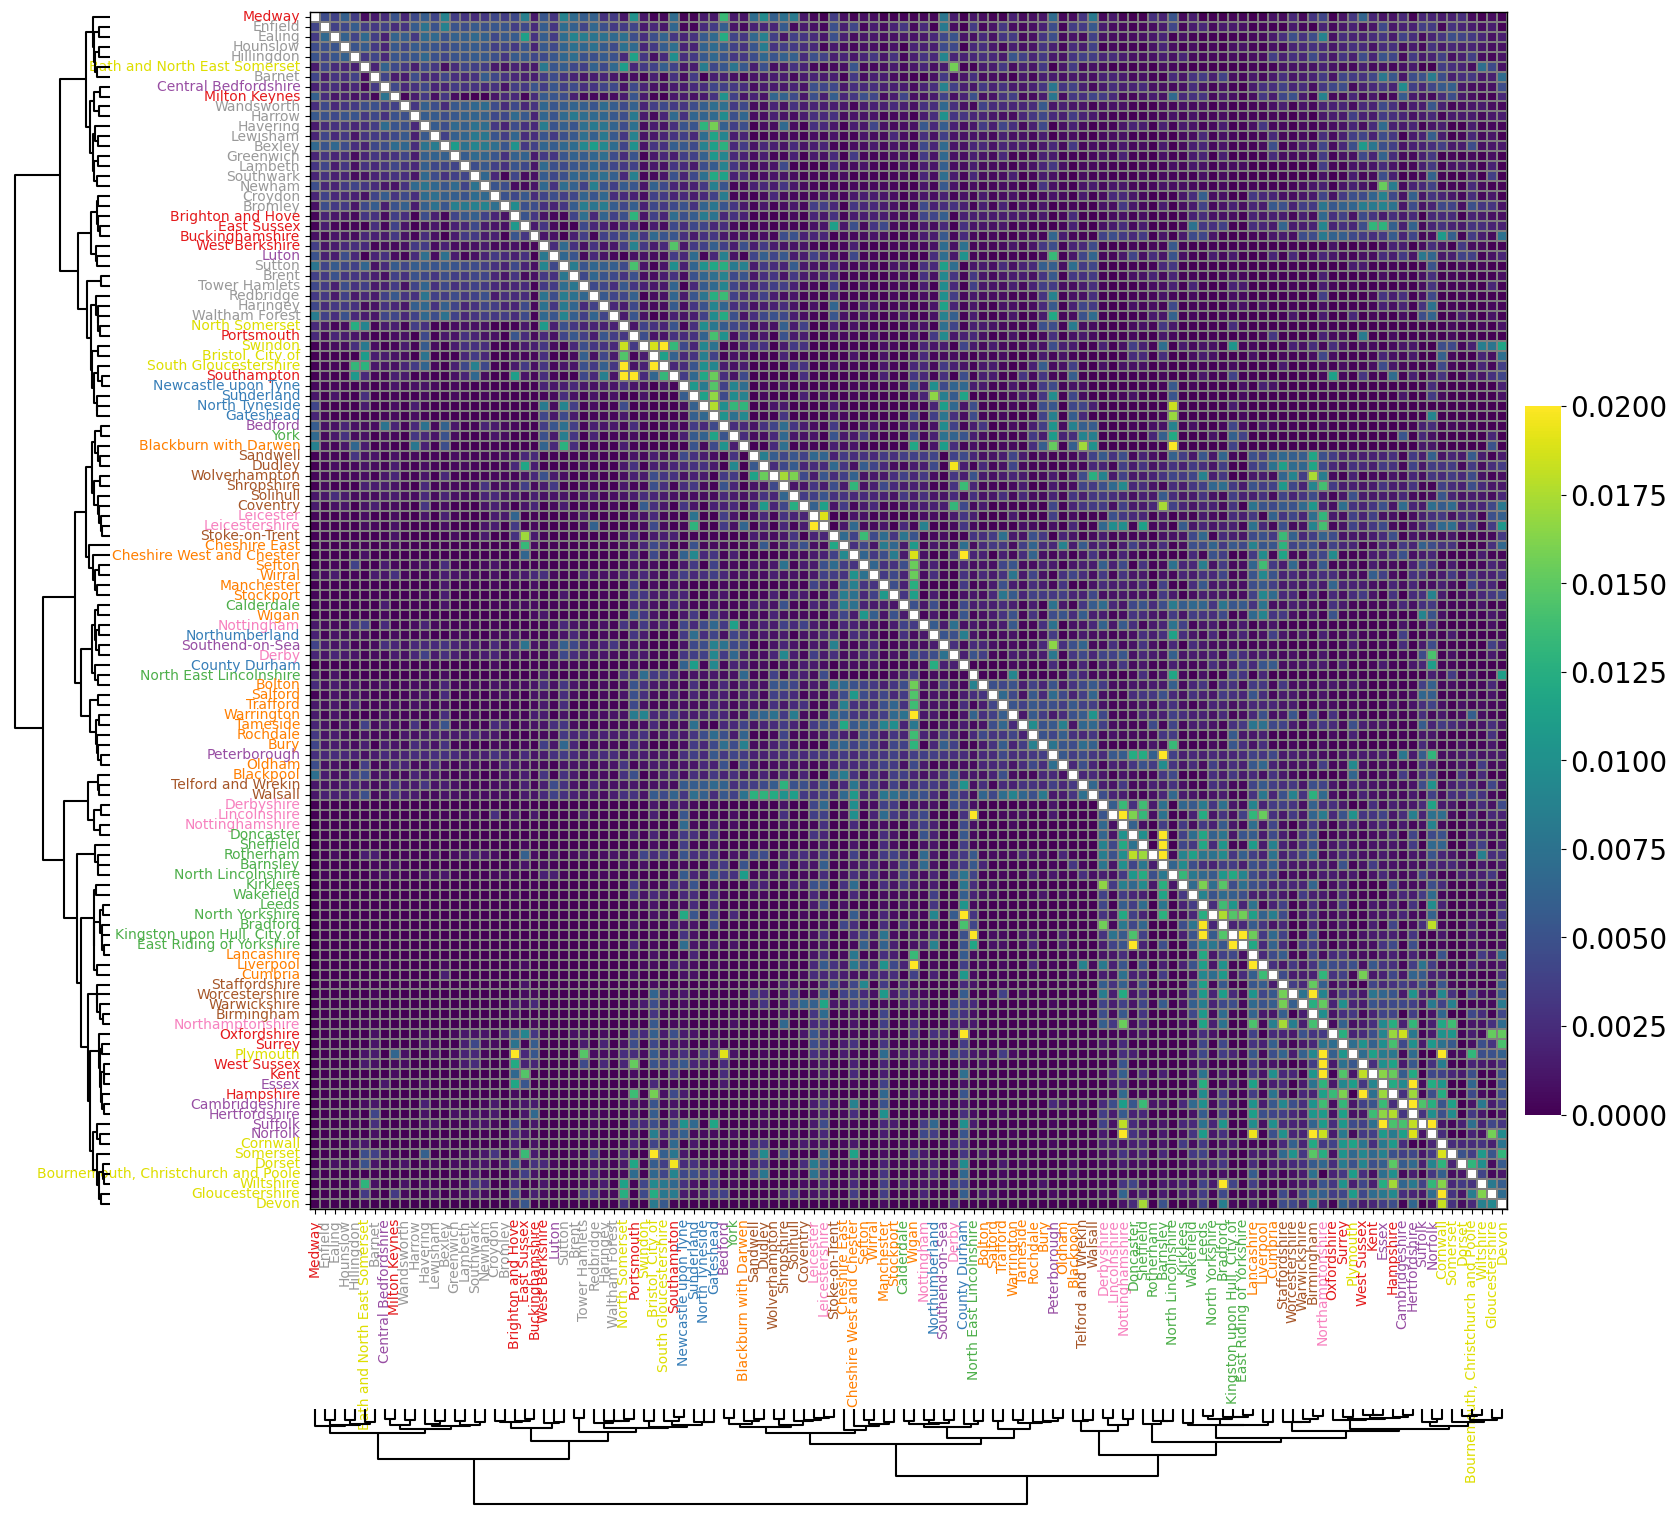

In [73]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

data0=Amean.copy()
distA= distdemes_from_A(Amean)
for i in range(ND):
        distA[i,i]=0
distA = 0.5*(distA + distA.T)

ylinkage = linkage(squareform(distA),  method='ward')
plt.figure(figsize=(23,23))

main_axes = plt.gca()
divider = make_axes_locatable(main_axes)
plt.sca(divider.append_axes("left", 1.0, pad=2))
ydendro = dendrogram(ylinkage, orientation='left', no_labels=True,
                        distance_sort='descending', link_color_func=lambda x: 'black')
plt.gca().set_axis_off()

cl_order = ydendro['leaves'].copy()

plt.sca(divider.append_axes("bottom", 1.0, pad=2))
ydendro = dendrogram(ylinkage, orientation='bottom', no_labels=True,
                        distance_sort='aescending', link_color_func=lambda x: 'black')
plt.gca().set_axis_off()

data_off=data0[cl_order][:,cl_order].copy()
for i in range(len(data_off)):
        data_off[i,i] = np.nan
plt.sca(main_axes)
ax=sns.heatmap(data_off, cmap='viridis', vmin = 0.0, vmax =0.02,
        xticklabels= np.array(df_demes['deme'])[cl_order],yticklabels= np.array(df_demes['deme'])[cl_order],
        square=True, cbar_kws={'shrink':0.4, 'pad':0.01},linewidths=.01, linecolor='gray')

for i, label in enumerate(plt.gca().get_xticklabels()):
        deme = label.get_text()
        re = df_demes[df_demes['deme']==deme]['region'].iloc[0]
        label.set_color(CB_colors[England_regions.index(re)])
for i, label in enumerate(plt.gca().get_yticklabels()):
        deme = label.get_text()
        re = df_demes[df_demes['deme']==deme]['region'].iloc[0]
        label.set_color(CB_colors[England_regions.index(re)])

# Drawing the frame
for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
ax.set_title('')
plt.show()

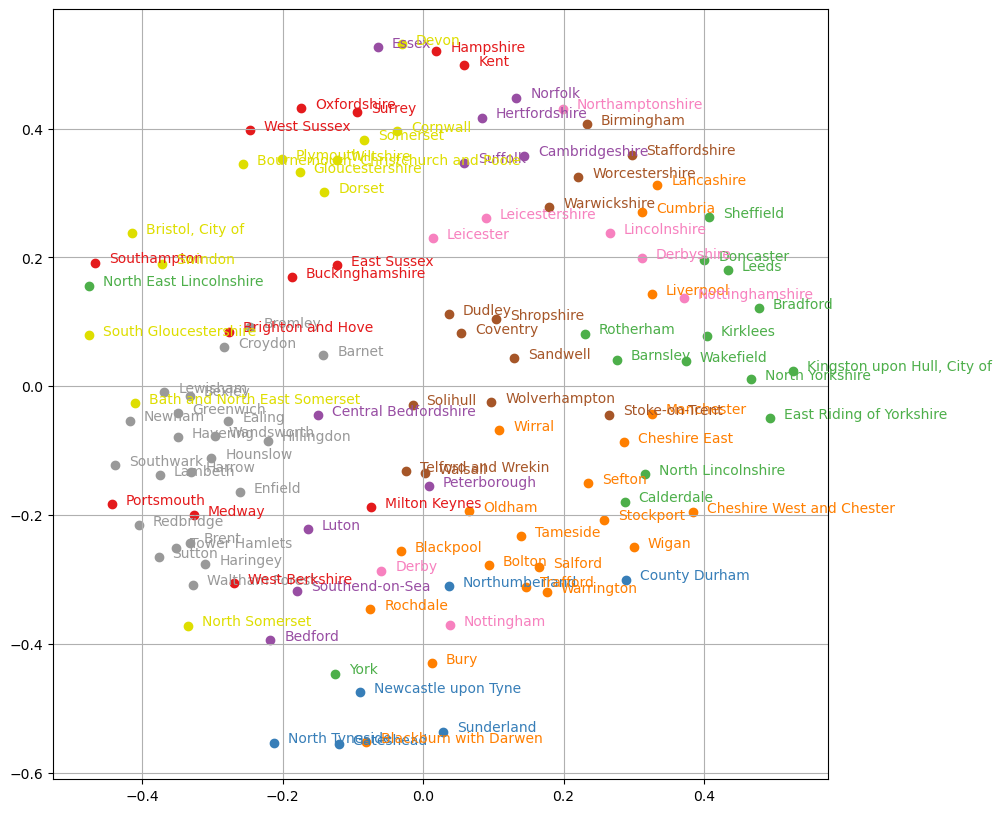

In [74]:
mds = MDS(
n_components=2,
max_iter=50000,
eps=1e-5,
random_state=10,
dissimilarity="precomputed",
n_jobs=1)

pos = mds.fit_transform(distA)

plt.figure(figsize=[10,10])
for i in range(ND):
    c= CB_colors[England_regions.index(df_demes['region'].iloc[i])]
    plt.scatter(pos[i,0]-0.02,pos[i,1],color=c)
    plt.text(pos[i,0],pos[i,1],df_demes['deme'].iloc[i],color=c)
plt.grid()
plt.show()

# #demes =50

In [75]:
ND=50
res_A=np.load('data/A_Delta_England/res_A_ND'+str(ND)+'.npy')
Amean=np.mean(res_A,axis=0)
df_demes=pd.read_csv('data/A_Delta_England/demes_ND'+str(ND)+'.csv',index_col=0)


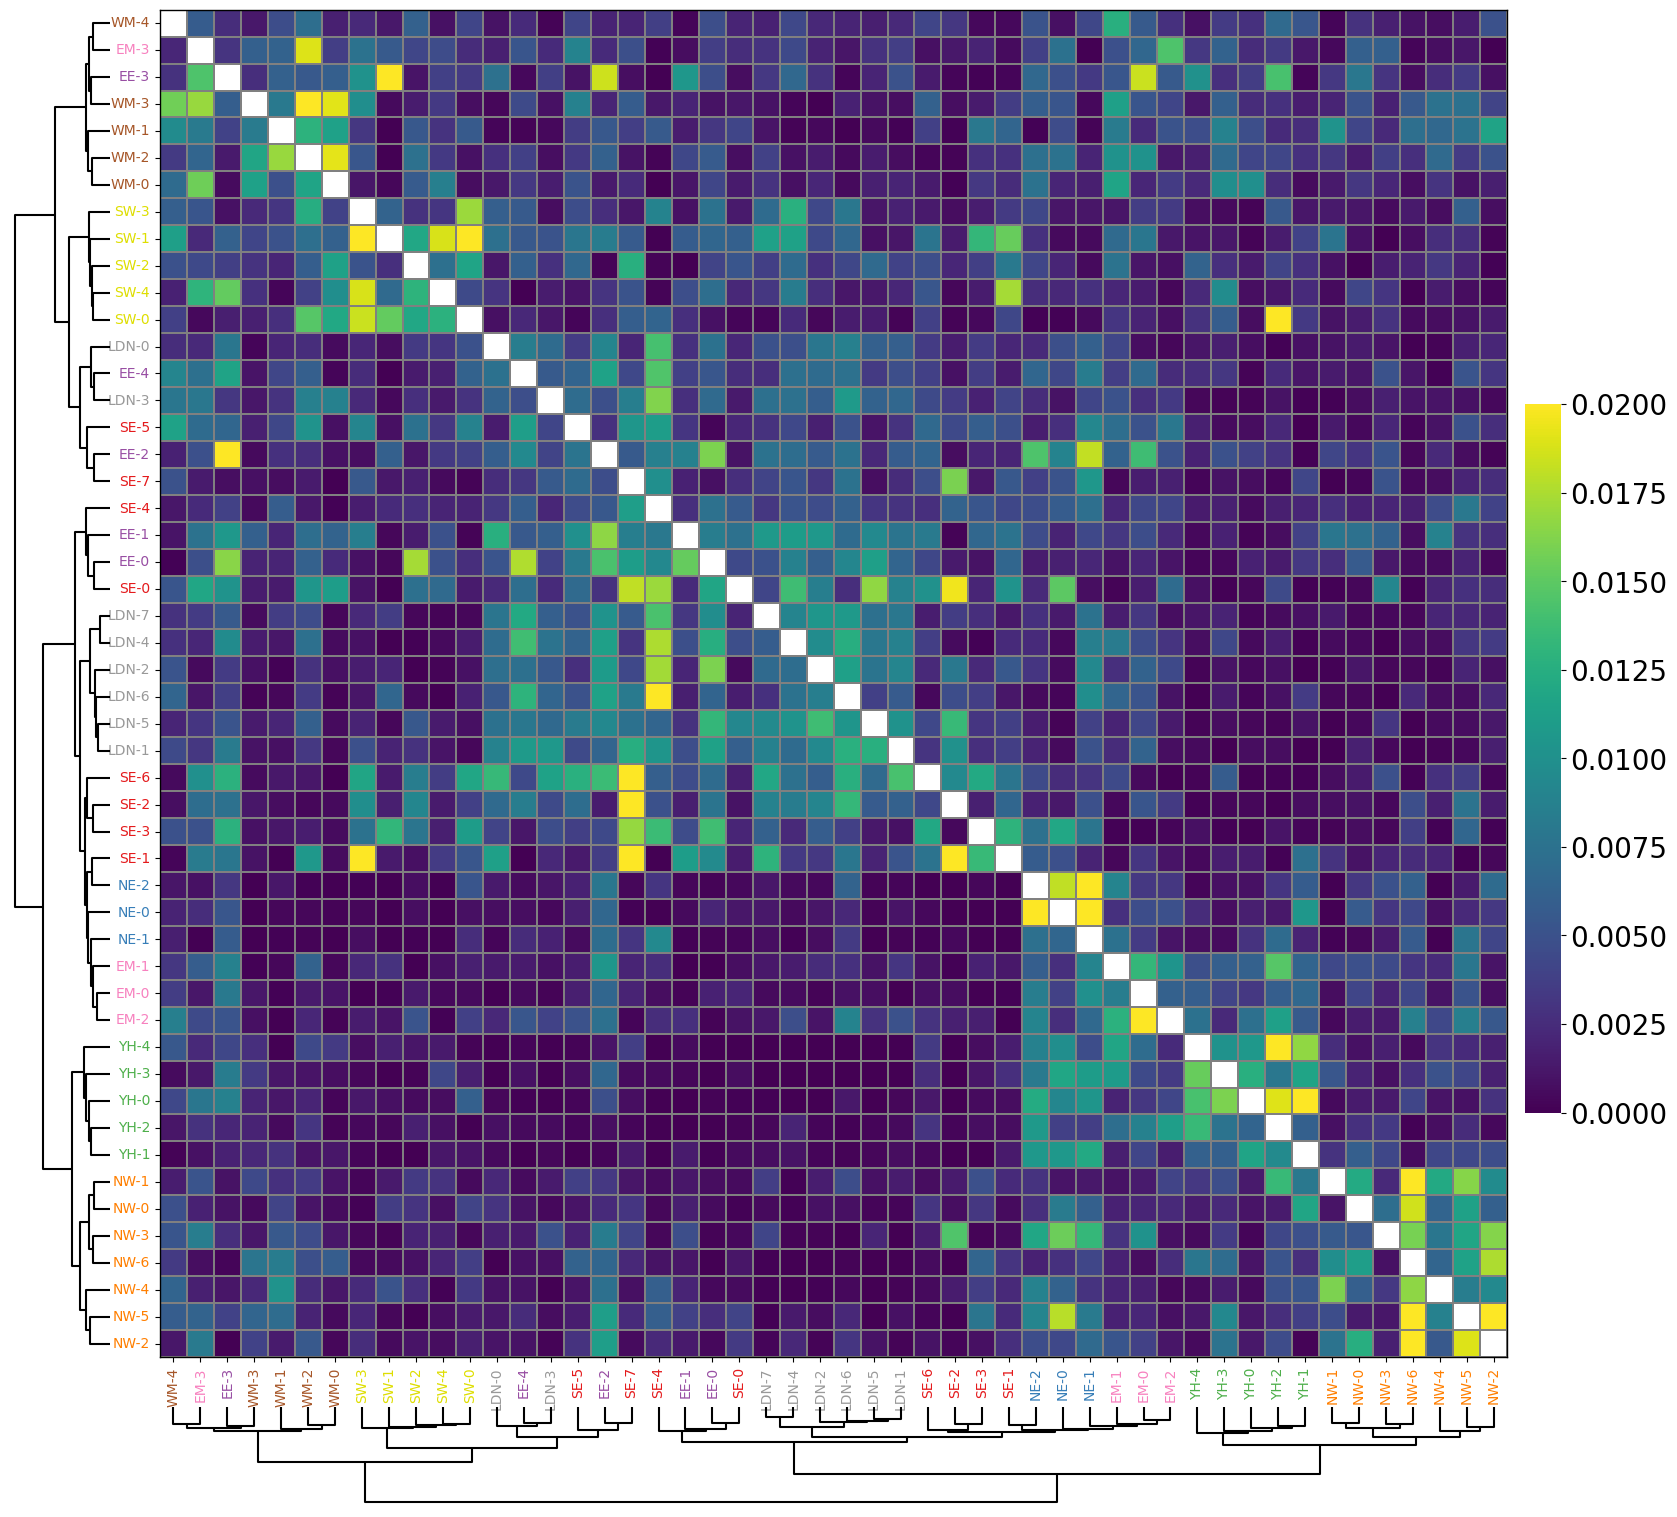

In [80]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

data0=Amean.copy()
distA= distdemes_from_A(Amean)
for i in range(ND):
        distA[i,i]=0
distA = 0.5*(distA + distA.T)

ylinkage = linkage(squareform(distA),  method='ward')
plt.figure(figsize=(23,23))

main_axes = plt.gca()
divider = make_axes_locatable(main_axes)
plt.sca(divider.append_axes("left", 1.0, pad=.5))
ydendro = dendrogram(ylinkage, orientation='left', no_labels=True,
                        distance_sort='descending', link_color_func=lambda x: 'black')
plt.gca().set_axis_off()

cl_order = ydendro['leaves'].copy()

plt.sca(divider.append_axes("bottom", 1.0, pad=.5))
ydendro = dendrogram(ylinkage, orientation='bottom', no_labels=True,
                        distance_sort='aescending', link_color_func=lambda x: 'black')
plt.gca().set_axis_off()

data_off=data0[cl_order][:,cl_order].copy()
for i in range(len(data_off)):
        data_off[i,i] = np.nan
plt.sca(main_axes)
ax=sns.heatmap(data_off, cmap='viridis', vmin = 0.0, vmax =0.02,
        xticklabels= np.array(df_demes['deme'])[cl_order],yticklabels= np.array(df_demes['deme'])[cl_order],
        square=True, cbar_kws={'shrink':0.4, 'pad':0.01},linewidths=.01, linecolor='gray')

for i, label in enumerate(plt.gca().get_xticklabels()):
        deme = label.get_text()
        re = df_demes[df_demes['deme']==deme]['region'].iloc[0]
        label.set_color(CB_colors[England_regions.index(re)])
for i, label in enumerate(plt.gca().get_yticklabels()):
        deme = label.get_text()
        re = df_demes[df_demes['deme']==deme]['region'].iloc[0]
        label.set_color(CB_colors[England_regions.index(re)])

# Drawing the frame
for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
ax.set_title('')
plt.show()

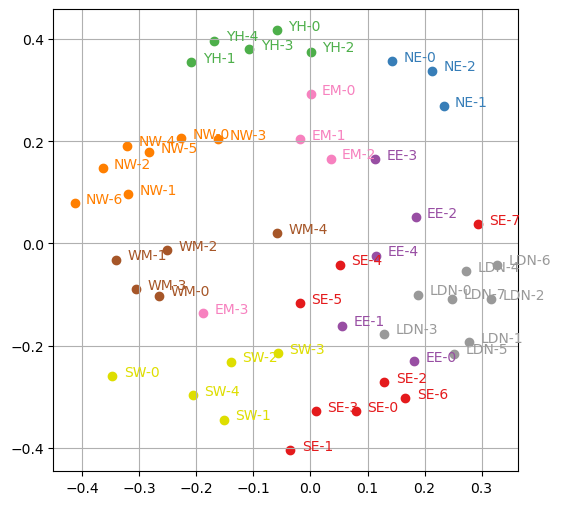

In [81]:
mds = MDS(
n_components=2,
max_iter=50000,
eps=1e-5,
random_state=10,
dissimilarity="precomputed",
n_jobs=1)

pos = mds.fit_transform(distA)

plt.figure(figsize=[6,6])
for i in range(ND):
    c= CB_colors[England_regions.index(df_demes['region'].iloc[i])]
    plt.scatter(pos[i,0]-0.02,pos[i,1],color=c)
    plt.text(pos[i,0],pos[i,1],df_demes['deme'].iloc[i],color=c)
plt.grid()
plt.show()